In [ ]:
!pip install torchmetrics
!pip install torcheval

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/363.4 MB 132.4 MB/s eta 0:00:03

In [ ]:
from statistics import linear_regression
from sklearn import svm
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelBinarizer


from sklearn.pipeline import Pipeline
import nltk
import umap
from nltk.help import upenn_tagset
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, precision_score, average_precision_score,roc_auc_score
import pandas as pd
import numpy as np
import time
import os
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import auc
from sklearn.naive_bayes import MultinomialNB

from nltk.corpus import wordnet,subjectivity,stopwords
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.tag.perceptron import PerceptronTagger
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_fscore_support
import re
import string
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression

import torch # torch provides basic functions, from setting a random seed (for reproducability) to creating tensors.
import torch.nn as nn # torch.nn allows us to create a neural network.
import torch.nn.functional as F # nn.functional give us access to the activation and loss functions.
from torch.optim import Adam # optim contains many optimizers. Here, we're using SGD, stochastic gradient descent, specifically Adam.
from torch.utils.data import TensorDataset, DataLoader

import matplotlib.pyplot as plt ## matplotlib allows us to draw graphs.
import seaborn as sns ## seaborn makes it easier to draw nice-looking graphs.

nltk.download("subjectivity")
nltk.download('tagsets_json')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package subjectivity to /root/nltk_data...
[nltk_data]   Unzipping corpora/subjectivity.zip.
[nltk_data] Downloading package tagsets_json to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets_json.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import os
file_path_dev = "en_gum-ud-dev.conllu"
file_path_train = "en_gum-ud-train.conllu"
file_path_test = "en_gum-ud-test.conllu"
print(os.getcwd())
import pyconll
def read_conllu(path):
    data = pyconll.load_from_file(path)
    tagged_sentences=[]
    t=0
    for sentence in data:
        tagged_sentence=[]
        for token in sentence:
            if token.upos:
                t+=1
                tagged_sentence.append((token.form.lower(), token.upos))
        tagged_sentences.append(tagged_sentence)
    return tagged_sentences
data_dev = read_conllu(file_path_dev)
data_train = read_conllu(file_path_train)
data_test = read_conllu(file_path_test)

print(len(data_dev))
print(len(data_train))
print(len(data_test))
print(data_dev[0],data_train[0],data_test[0])
def load_ud_treebank_data(sentences):
    # Sample format: (word, pos_tag)

    words = []
    pos_tags = []

    for sentence in sentences:
        for word, pos in sentence:
            words.append(word)
            pos_tags.append(pos)

    return words, pos_tags
X_dev,Y_dev = load_ud_treebank_data(data_dev)
X_train,Y_train = load_ud_treebank_data(data_train)
X_test,Y_test = load_ud_treebank_data(data_test)

print(X_dev[0],Y_dev[0])
print(X_train[0],Y_train[0])
print(X_test[0],Y_test[0])

str_labels = set(Y_train + Y_dev + Y_test)

/content
1341
9520
1285
[('introduction', 'NOUN')] [('aesthetic', 'ADJ'), ('appreciation', 'NOUN'), ('and', 'CCONJ'), ('spanish', 'ADJ'), ('art', 'NOUN'), (':', 'PUNCT')] [('the', 'DET'), ('prevalence', 'NOUN'), ('of', 'ADP'), ('discrimination', 'NOUN'), ('across', 'ADP'), ('racial', 'ADJ'), ('groups', 'NOUN'), ('in', 'ADP'), ('contemporary', 'ADJ'), ('america', 'PROPN'), (':', 'PUNCT')]
introduction NOUN
aesthetic ADJ
the DET


In [ ]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
def plot_training_histories(histories,hyper_parameters):
    # global hyper_parameters
    # Plotting loss
    colors = [("lightgreen","green"),("lightblue","blue"),("pink","red")]
    plt.figure()
    for (index,history) in enumerate(histories):
      plt.plot(history['train_loss'], label=f'Training Loss {hyper_parameters[index][0],hyper_parameters[index][1],hyper_parameters[index][2]}',color=colors[index][0])
      plt.plot(history['val_loss'], label=f'Validation Loss {hyper_parameters[index][0],hyper_parameters[index][1],hyper_parameters[index][2]}',color=colors[index][1])

    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc=(0.42,0.2))
    plt.show()

    plt.figure()
    for (index,history) in enumerate(histories):
        plt.plot(history['train_accuracy'], label=f'Training Accuracy {hyper_parameters[index][0],hyper_parameters[index][1],hyper_parameters[index][2]}',color=colors[index][0])
        plt.plot(history['val_accuracy'], label=f'Validation Accuracy {hyper_parameters[index][0],hyper_parameters[index][1],hyper_parameters[index][2]}',color=colors[index][1])
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    plt.figure()
    for (index,history) in enumerate(histories):
        plt.plot(history['train_f1_score'], label=f'Training Accuracy {hyper_parameters[index][0],hyper_parameters[index][1],hyper_parameters[index][2]}',color=colors[index][0])
        plt.plot(history['val_f1_score'], label=f'Validation Accuracy {hyper_parameters[index][0],hyper_parameters[index][1],hyper_parameters[index][2]}',color=colors[index][1])
    plt.title('F1 Score Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('F1 Score')
    plt.legend()
    plt.show()

In [ ]:
def plot_training_history(history):
    # Plotting loss
    plt.figure()
    plt.plot(history['train_loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plotting accuracy
    plt.figure()
    plt.plot(history['train_accuracy'], label='Training Accuracy')
    plt.plot(history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Plotting F1 score
    plt.figure()
    plt.plot(history['train_f1_score'], label='Training F1 Score')
    plt.plot(history['val_f1_score'], label='Validation F1 Score')
    plt.title('F1 Score Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('F1 Score')
    plt.legend()
    plt.show()

In [ ]:
stop_words = set(stopwords.words("english"))
def tokenize_samples(samples):
    tokenized_samples = []
    for sample in samples:
        tokens = []
        # Split text into sentences
        sentences = sent_tokenize(sample)
        for sent in sentences:
            # Tokenize each sentence into words
            words = word_tokenize(sent)
            for word in words:
                # Filter out stopwords and unwanted tokens
                if '\n' in word or "\t" in word or "--" in word or "*" in word or word.lower() in stop_words:
                    continue
                if word.strip():
                    # Process the token and add to list
                    tokens.append(word.replace('"', "'").strip().lower())
        tokenized_samples.append(tokens)

    return tokenized_samples

In [ ]:
print('Train samples: {}'.format(len(X_train)))
print('Val samples: {}'.format(len(X_dev)))
print('Test samples: {}'.format(len(X_test)))
old_x_train = X_train.copy()
old_y_train = Y_train.copy()
old_x_dev = X_dev.copy()
old_y_dev = Y_dev.copy()
old_x_test = X_test.copy()
old_y_test = Y_test.copy()
DATASET_SIZE = 7000
X_train = X_train[:DATASET_SIZE]
Y_train = Y_train[:DATASET_SIZE]
X_dev = X_dev[:3000]
Y_dev = Y_dev[:3000]
X_test = X_test[:3000]
Y_test = Y_test[:3000]

X_train_tokenized = tokenize_samples(X_train)
X_val_tokenized = tokenize_samples(X_dev)
X_test_tokenized = tokenize_samples(X_test)


Train samples: 164108
Val samples: 23920
Test samples: 24005


In [ ]:
for i in range(len(str_labels)):
    print(i in Y_train,end=" ")
print()
for i in range(len(str_labels)):
    print(i in Y_dev,end=" ")

print()
for i in range(len(str_labels)):
    print(i in Y_test,end=" ")

print()

False False False False False False False False False False False False False False False False False 
False False False False False False False False False False False False False False False False False 
False False False False False False False False False False False False False False False False False 


In [ ]:
labels = list(str_labels)
print(labels,len(labels))
labels_dict = {}
for x,y in enumerate(labels):
    labels_dict[y] = x
print(labels_dict)
Y_train = list(map(lambda x: labels_dict[x],Y_train))
Y_dev = list(map(lambda x: labels_dict[x],Y_dev))
Y_test = list(map(lambda x: labels_dict[x],Y_test))
print(Y_train[:3],Y_dev[:3],Y_test[:3])

['ADJ', 'PART', 'NOUN', 'VERB', 'PUNCT', 'CCONJ', 'SCONJ', 'NUM', 'ADV', 'PRON', 'DET', 'X', 'SYM', 'AUX', 'INTJ', 'PROPN', 'ADP'] 17
{'ADJ': 0, 'PART': 1, 'NOUN': 2, 'VERB': 3, 'PUNCT': 4, 'CCONJ': 5, 'SCONJ': 6, 'NUM': 7, 'ADV': 8, 'PRON': 9, 'DET': 10, 'X': 11, 'SYM': 12, 'AUX': 13, 'INTJ': 14, 'PROPN': 15, 'ADP': 16}
[0, 2, 5] [2, 2, 16] [10, 2, 16]


In [ ]:
from collections import Counter


MAX_SEQUENCE_LENGTH = 100
MAX_TOKENS_FOR_VOCABULARY = 100000

# Build vocabulary from tokens in X_train_tokenized
all_tokens = [token for sentence in X_train_tokenized for token in sentence]
token_counts = Counter(all_tokens)

# Initialize vocabulary with special tokens <pad> and <unk>
vocab = {"<pad>": 0, "<unk>": 1}

# Sort tokens by frequency in descending order and add to vocab starting from 2
for i, (token, _) in enumerate(token_counts.most_common(MAX_TOKENS_FOR_VOCABULARY), start=2):
    vocab[token] = i

# Encode and pad each sentence
def encode_sentence(sentence, vocab, max_length=100):
    # Map each token to its vocabulary ID or <unk> if not in vocab
    encoded = [vocab.get(token, vocab["<unk>"]) for token in sentence]
    # Pad or truncate to max_length
    return encoded[:max_length] + [vocab["<pad>"]] * max(0, max_length - len(encoded))

# Apply encoding and padding to each sentence in X_train_tokenized
train_data = [encode_sentence(sentence, vocab, MAX_SEQUENCE_LENGTH) for sentence in X_train_tokenized]
val_data = [encode_sentence(sentence, vocab, MAX_SEQUENCE_LENGTH) for sentence in X_val_tokenized]
test_data = [encode_sentence(sentence, vocab, MAX_SEQUENCE_LENGTH) for sentence in X_test_tokenized]

In [ ]:
EMBEDDING_DIM = 300
# from our data it probably does not need more than 1.5k
MAX_WORDS = 100_000
MAX_SEQUENCE_LENGTH = 300
embedding_matrix = np.zeros((MAX_WORDS+2, EMBEDDING_DIM))

count = 0
for word, i in vocab.items():
    if i > MAX_WORDS:
            continue
    try:
        embedding_matrix[i] = wv[word]
        count+=1
    except:
        pass

#Return the number of the elements that are non-zero.
print(len(np.unique(np.nonzero(embedding_matrix)[0])))
print(count)

print(embedding_matrix.shape)

1536
1536
(100002, 300)


In [ ]:
y_train = Y_train
y_val = Y_dev
y_test = Y_test
train_dataset = TensorDataset(torch.tensor(train_data, dtype = torch.long), torch.tensor(y_train, dtype = torch.long))
val_dataset = TensorDataset(torch.tensor(val_data, dtype = torch.long), torch.tensor(y_val, dtype = torch.long))
test_dataset = TensorDataset(torch.tensor(test_data, dtype = torch.long), torch.tensor(y_test, dtype = torch.long))

BATCH_SIZE = 256
# Create DataLoader for each dataset
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)
# _,labels_of_data = prepare_data_of_subj_obj()
print(train_dataset[:5])

(tensor([[124,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [403,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   

In [ ]:
FILTERS = 128  # the dimensionality of the output space (i.e. the number of output filters in the convolution)
KERNEL = 3  # the length of the 1D convolution window
DENSE = 128

N_CLASSES = 17
EMBEDDING_DIM = 300
MAX_WORDS = 100_000
MAX_SEQUENCE_LENGTH = 250

class Stacked_CNN(nn.Module):
    def __init__(self, input_dim, n_classes, dense, filters, kernel, matrix_embeddings = None,dropout=0.2):
        super(Stacked_CNN, self).__init__()

        # dimensions
        self.input_dim = input_dim
        self.n_classes = n_classes
        self.filters = filters
        self.kernel = kernel
        self.dense = dense

        # Embedding layer
        if matrix_embeddings is not None:
            self.embedding_layer = nn.Embedding(num_embeddings = MAX_WORDS + 2, embedding_dim = EMBEDDING_DIM, padding_idx=0).from_pretrained(matrix_embeddings)
            self.embedding_layer.requires_grad = False # Don't change the embedding matrix
        else:
            self.embedding_layer = nn.Embedding(num_embeddings = MAX_WORDS + 2, embedding_dim = EMBEDDING_DIM, padding_idx=0)
            self.embedding_layer.requires_grad = True # Learn the embedding matrix

        self.conv1 = nn.Conv1d(in_channels = self.input_dim, out_channels=self.filters, kernel_size=self.kernel, padding = "valid") # Padding can either be "valid" or "same". "same" ensures the output length remains the same
        self.conv2 = nn.Conv1d(in_channels = self.filters, out_channels=self.filters, kernel_size=self.kernel, padding = "valid")   # by padding the input whereas "valid" doesn't pad the input hence reducing the output
        self.conv3 = nn.Conv1d(in_channels = self.filters, out_channels=self.filters, kernel_size=self.kernel, padding = "valid")   # length (the amount it reduces it by is dependent on the kernel size)
        self.conv4 = nn.Conv1d(in_channels = self.filters, out_channels=self.filters, kernel_size=self.kernel, padding = "valid")
        self.conv5 = nn.Conv1d(in_channels = self.filters, out_channels=self.filters, kernel_size=self.kernel, padding = "valid")

        self.global_max_pool = nn.AdaptiveMaxPool1d(output_size = 1)

        self.dense_layer = nn.Linear(in_features = self.filters, out_features = self.dense)

        self.output = nn.Linear(in_features = self.dense, out_features = self.n_classes)

        self.dropout = nn.Dropout(dropout)

    def forward(self, input):
        # Input shape: (batch_size, sequence_length)
        # Embedding layer
        x = self.embedding_layer(input.long()) # (batch_size, sequence_length, embedding_dim)

        # Dropout embeddings
        x = self.dropout(x) # (batch_size, sequence_length, embedding_dim)

        # Transpose x because Conv1d expects input of (batch_size, in_channels, sequence_length) where in_channels maps to our embedding_dim here
        x = x.transpose(1, 2) # (batch_size, embedding_dim, sequence_length)

        # Stack of convolutions. Note that my shapes here are specific to my kernel size which is 3. I explain where these numbers come from in the comments.
        x = self.conv1(x) # (batch_size, filters, sequence_length - 2)             The 2 here comes from kernel_size - 1 where 1 is the stride. This number changes depending on the kernel_size
        x = F.relu(x) # (batch_size, filters, sequence_length - 2)

        x = self.conv2(x) # (batch_size, filters, sequence_length - 4)
        x = F.relu(x) # (batch_size, filters, sequence_length - 4)

        x = self.conv3(x) # (batch_size, filters, sequence_length - 6)
        x = F.relu(x) # (batch_size, filters, sequence_length - 6)

        x = self.conv4(x) # (batch_size, filters, sequence_length - 8)
        x = F.relu(x) # (batch_size, filters, sequence_length - 8)

        x = self.conv5(x) # (batch_size, filters, sequence_length - 10)
        x = F.relu(x) # (batch_size, filters, sequence_length - 10)

        # Global max pooling
        x = self.global_max_pool(x) # (batch_size, filters, 1)
        x = x.squeeze(2) # (batch_size, filters)

        # Dense layer
        x = self.dense_layer(x) # (batch_size, dense)
        x = F.relu(x) # (batch_size, dense)

        # Dropout
        x = self.dropout(x) # (batch_size, dense)

        # Output layer (Logits)
        logits = self.output(x) # (batch_size, n_classes)

        return logits

In [ ]:
import time
import os
from torchmetrics.classification import MultilabelAccuracy, MultilabelF1Score,MulticlassAUROC

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def train_model(model,epochs):
    torch.manual_seed(1)
    model.to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()

    # Initialize TorchMetrics for multi-label metrics
    # accuracy_metric = MultilabelAccuracy(num_labels=N_CLASSES, threshold=0.5, average='micro').to(device)
    # f1_metric = MultilabelF1Score(num_labels=N_CLASSES, threshold=0.5, average='micro').to(device)

    # Hyperparameters
    best_val_loss = float("inf")
    best_model_path = None
    early_stopping_patience = 5
    early_stopping_counter = 0

    # Training history
    history = {
        'train_loss': [], 'val_loss': [],
        'train_accuracy': [], 'val_accuracy': [],
        'train_f1_score': [], 'val_f1_score': [],
        'train_roc_auc':[], 'val_roc_auc': []
    }

    start_training_time = time.time()
    metric_auroc_training = MulticlassAUROC(num_classes=17, average="macro").to(device)
    metric_auroc_validation = MulticlassAUROC(num_classes=17, average="macro").to(device)
    # Training loop
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        train_outputs = []
        train_labels = []

        # Training phase
        for batch in train_loader:
            features, labels = batch
            features = features.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            # Forward pass
            outputs = model(features)

            # Loss calculation also does log-softmax
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            train_outputs.append(outputs)
            train_labels.append(labels)

        # Post-epoch training calculations
        train_outputs = torch.cat(train_outputs)
        train_labels = torch.cat(train_labels)

        # Convert logits to binary predictions
        train_predicted_classes = torch.argmax(train_outputs, dim=1)

        # train_predicted_classes = (train_outputs.sigmoid() > 0.5).float()

        # Compute metrics using TorchMetrics
        train_accuracy = accuracy_score(train_predicted_classes, train_labels)
        train_f1_score = f1_score(train_predicted_classes, train_labels,average="weighted")

        train_probabilities = F.softmax(train_outputs,dim=1)
        metric_auroc_training.update(train_probabilities, train_labels)  # Update the metric with predictions and labels
        train_auc = metric_auroc_training.compute()

        # train_auc = roc_auc_score(train_probabilities.detach().numpy(),train_labels,average="macro",multi_class="ovr")

        train_loss = running_loss / len(train_loader)
        history['train_loss'].append(train_loss)
        history['train_accuracy'].append(train_accuracy)
        history['train_f1_score'].append(train_f1_score)
        history['train_roc_auc'].append(train_auc)

        print(f"Epoch {epoch + 1}/{epochs}, Training Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.4f}, F1 Score: {train_f1_score:.4f}, AUC: {train_auc}")

        # Validation phase
        model.eval()
        val_running_loss = 0.0
        val_outputs = []
        val_labels = []

        with torch.no_grad():
            for features, labels in val_loader:
                features = features.to(device)
                labels = labels.to(device)

                outputs = model(features)

                # Validation loss
                loss = criterion(outputs, labels)
                val_running_loss += loss.item()

                val_outputs.append(outputs)
                val_labels.append(labels)

        # Post-epoch validation calculations
        val_outputs = torch.cat(val_outputs)
        val_labels = torch.cat(val_labels)

        # Convert logits to binary predictions
        val_predicted_classes = torch.argmax(val_outputs,dim=1)
        # val_predicted_classes = (val_outputs.sigmoid() > 0.5).float()

        # Compute validation metrics using TorchMetrics
        val_accuracy = accuracy_score(val_predicted_classes, val_labels)
        val_f1 = f1_score(val_predicted_classes, val_labels,average="weighted")

        val_probabilities = F.softmax(val_outputs,dim=1)
        metric_auroc_validation.update(val_probabilities, val_labels)  # Update the metric with predictions and labels
        val_auc = metric_auroc_validation.compute()
        # val_auc = roc_auc_score(val_probabilities.detach().numpy(),val_labels,average="macro",multi_class="ovr")

        val_loss = val_running_loss / len(val_loader)
        history['val_loss'].append(val_loss)
        history['val_accuracy'].append(val_accuracy)
        history['val_f1_score'].append(val_f1)
        history['val_roc_auc'].append(val_auc)

        print(f"Validation Loss: {val_loss:.4f}, Accuracy: {val_accuracy:.4f}, F1 Score: {val_f1:.4f}, AUC {val_auc}")

        # Early stopping and checkpointing
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            early_stopping_counter = 0  # Reset counter if validation improves

            new_model_path = f'model_best_epoch_{epoch + 1}.pth'

            # Delete the previous best model
            if best_model_path is not None:
                os.remove(best_model_path)

            # Save the new best model
            torch.save(model.state_dict(), new_model_path)
            best_model_path = new_model_path
        else:
            early_stopping_counter += 1

        # Stop training if no improvement for 5 epochs
        if early_stopping_counter >= early_stopping_patience:
            print("Early stopping triggered. No improvement in validation loss for 5 consecutive epochs.")
            break

    print("Training complete!")
    end_training_time = time.time()
    return model,history,best_model_path

In [ ]:
hyper_parameters = [(DENSE,FILTERS,KERNEL),(64,64,3),(32,32,3)]
cnn_results = []
for dense,filters,kernel in hyper_parameters:
    model = Stacked_CNN(input_dim = EMBEDDING_DIM,
                            n_classes = N_CLASSES,
                            dense = dense,
                            filters = filters,
                            kernel = kernel,
                            matrix_embeddings = torch.tensor(embedding_matrix, dtype = torch.float))
    result = train_model(model,3)
    cnn_results.append(result)

Epoch 1/3, Training Loss: 2.5727, Accuracy: 0.1654, F1 Score: 0.2242, AUC: 0.5033451318740845
Validation Loss: 2.4961, Accuracy: 0.1737, F1 Score: 0.2959, AUC 0.5571375489234924
Epoch 2/3, Training Loss: 2.1308, Accuracy: 0.2731, F1 Score: 0.3832, AUC: 0.5806822180747986
Validation Loss: 2.3347, Accuracy: 0.1897, F1 Score: 0.2702, AUC 0.5756600499153137
Epoch 3/3, Training Loss: 1.8525, Accuracy: 0.3700, F1 Score: 0.4509, AUC: 0.6344181299209595
Validation Loss: 2.3929, Accuracy: 0.2720, F1 Score: 0.3694, AUC 0.5885337591171265
Training complete!
Epoch 1/3, Training Loss: 2.6947, Accuracy: 0.1306, F1 Score: 0.2164, AUC: 0.5046157836914062
Validation Loss: 2.5934, Accuracy: 0.1750, F1 Score: 0.2979, AUC 0.5377846360206604
Epoch 2/3, Training Loss: 2.3538, Accuracy: 0.2247, F1 Score: 0.3522, AUC: 0.5274325013160706
Validation Loss: 2.4288, Accuracy: 0.1737, F1 Score: 0.2959, AUC 0.547030508518219
Epoch 3/3, Training Loss: 2.0556, Accuracy: 0.3249, F1 Score: 0.4312, AUC: 0.582674682140350

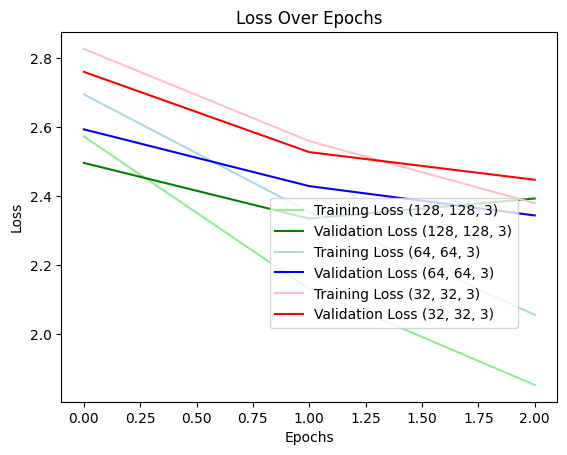

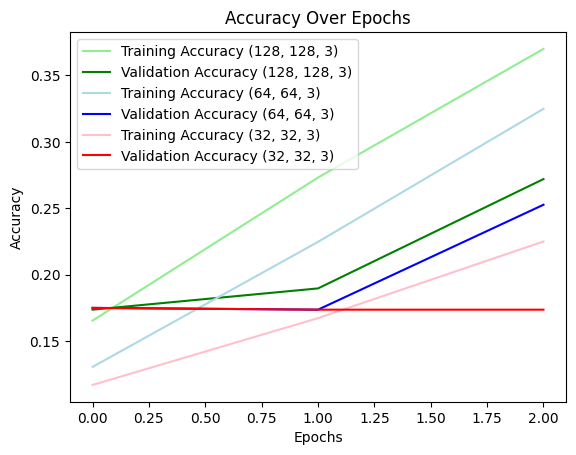

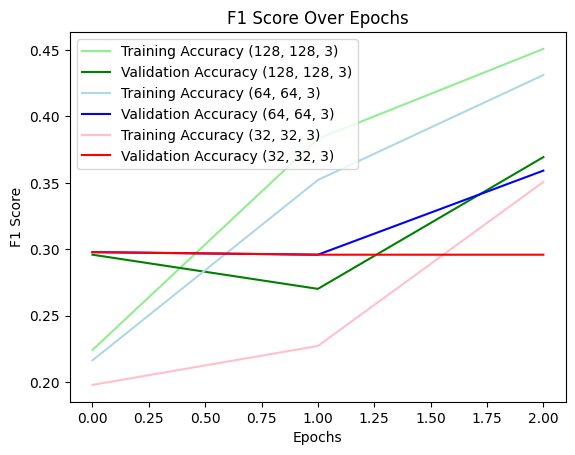

In [ ]:
plot_training_histories(list(map(lambda x: x[1],cnn_results)),hyper_parameters)

In [ ]:
auc = cnn_results[0][1]["train_roc_auc"]
# print(auc)
# print(str_labels)
for i in range(len(str_labels)):
    print(i in Y_train,end=" ")
print("======")
for i in range(len(str_labels)):
    print(i in Y_dev,end=" ")
print("=======")
for i in range(len(str_labels)):
  print(i in Y_dev,end=" ")

True True True True True True True True True False True True True True True True True ======
True True True True True True True True True True True True True True True True True =======
True True True True True True True True True True True True True True True True True 

In [ ]:
for pos,(model,history,best_model_path) in enumerate(cnn_results):
    # model.load_state_dict(torch.load(best_model_path, weights_only = True))
    dense,filters,kernel = hyper_parameters[pos]
    model_description = f"Stacked CNN with Dense: {dense} filters: {filters} kernels {kernel}"

    # pred_training = model(torch.tensor(train_data,dtype=torch.long))
    # y_pred_training = torch.argmax(pred_training,dim=1)
    # print(model)
    # print(f"Results in Training Data for {model_description}")
    # print(classification_report(y_train, y_pred_training, target_names=str_labels))

    pred_val = model(torch.tensor(val_data,dtype=torch.long))
    y_pred_val = torch.argmax(pred_val, dim=1)
    print(model)
    print(f"Results in Validation Data for {model_description}")
    print(classification_report(y_val, y_pred_val, target_names=str_labels))

    print(f'{model_description} Validation Accuracy: {accuracy_score(y_val, y_pred_val)*100:.2f}%')

    predictions_test = model(torch.tensor(test_data,dtype=torch.long))
    y_pred_test = torch.argmax(predictions_test, dim=1)
    print(f'{model_description} Test Accuracy:{accuracy_score(y_test, y_pred_test)*100:.2f}%')
    print(classification_report(y_test, y_pred_test, target_names=str_labels))

Stacked_CNN(
  (embedding_layer): Embedding(100002, 300)
  (conv1): Conv1d(300, 128, kernel_size=(3,), stride=(1,), padding=valid)
  (conv2): Conv1d(128, 128, kernel_size=(3,), stride=(1,), padding=valid)
  (conv3): Conv1d(128, 128, kernel_size=(3,), stride=(1,), padding=valid)
  (conv4): Conv1d(128, 128, kernel_size=(3,), stride=(1,), padding=valid)
  (conv5): Conv1d(128, 128, kernel_size=(3,), stride=(1,), padding=valid)
  (global_max_pool): AdaptiveMaxPool1d(output_size=1)
  (dense_layer): Linear(in_features=128, out_features=128, bias=True)
  (output): Linear(in_features=128, out_features=17, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)
Results in Validation Data for Stacked CNN with Dense: 128 filters: 128 kernels 3
              precision    recall  f1-score   support

       PROPN       0.00      0.00      0.00       315
        PART       0.00      0.00      0.00       126
         DET       0.00      0.00      0.00       332
         ADJ       0.00      0.00      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
